
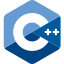
<br>

<div style="text-align:center; font-size:200%;">
 <b>RAII</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 02 RAII.ipynb -->
<!-- slides/module_160_raii/topic_110_raii.cpp -->


## Resource Acquisition Is Initialization (RAII)

Schema zur Ressourcenverwaltung in C++

- Ressourcen werden in Konstruktoren erworben
- Ressourcen werden in Destruktoren freigegeben

Ressourcenverwaltung ist damit automatisch


## Beispiel: Vektor

- Heap-Speicher wird im Konstruktor angelegt
- Heap-Speicher wird im Destruktor freigegeben
- Copy-Control-Operationen müssen die Ressourcen richtig verwalten


## C++ Core Guidelines für RAII

- [P.8: Don’t leak any
  resources](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#p8-dont-leak-any-resources)
- [R.1: Manage resources automatically using resource handles and RAII
  (Resource Acquisition Is
  Initialization)](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#r1-manage-resources-automatically-using-resource-handles-and-raii-resource-acquisition-is-initialization)
- [E.6: Use RAII to prevent
  leaks](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#e6-use-raii-to-prevent-leaks)


## Beispiel: Dateien

- [Filesystem](https://en.cppreference.com/w/cpp/filesystem)-Bibliothek für
  Dateioperationen (C++17)
- Ein- und Ausgabe über Streams


### RAII für Dateien

- Datei wird im Konstruktor geöffnet
- Datei wird im Destruktor geschlossen

Ressourcenverwaltung ist damit automatisch

In [ ]:
// !ls /tmp

In [ ]:
#include <fstream>
#include <iostream>

In [ ]:
{
    std::ifstream file{"/tmp/test.txt"};
    if (file) {
        std::cout << "File exists!\n";
    } else {
        std::cout << "Could not open file!\n";
    }
}

In [ ]:
{
    std::ofstream file{"/tmp/test.txt"};
    file << "Hello World!\n";
}

In [ ]:
// !ls /tmp

In [ ]:
{
    std::ifstream file{"/tmp/test.txt"};
    if (file) {
        std::string line;
        std::getline(file, line);
        if (file) {
            std::cout << "Line is: " << line << "\n";
        } else {
            std::cout << "Could not read line!\n";
        }
    } else {
        std::cout << "Could not open file!\n";
    }
    // file is closed here
}


- Vektoren können kopiert werden, Speicher wird dupliziert
- Bei anderen Ressourcen ist das nicht immer möglich
  - Dateien
  - Mutexes
  - Threads
  - ...

In [ ]:
#include <fstream>

In [ ]:
{
    std::ofstream file1{"/tmp/test.txt"};
    // std::ofstream file2{file1};
}

In [ ]:
{
    std::ofstream file1{"/tmp/test.txt"};
    std::ofstream file2{std::move(file1)};

    if (!file1.is_open()) {
        std::cout << "file1 is closed\n";
    }
    if (file2.is_open()) {
        std::cout << "file2 is open\n";
    }
}

In [ ]:
#include <filesystem>

In [ ]:
std::filesystem::exists("/tmp/test.txt");

In [ ]:
std::filesystem::path file{"/tmp/test.txt"};

std::cout << "stem = " << file.stem() << ", ext = " << file.extension() << "\n";

In [ ]:
std::filesystem::remove(file);

In [ ]:
std::filesystem::exists(file);

In [ ]:
// !ls /tmp


## Mini-Workshop: RAII Integer auf dem Heap

- Schreiben Sie eine Klasse `IntOnHeap`, die einen `int` Wert auf dem Heap
  verwaltet
- Ein Konstruktor soll einen `int` Wert übergeben bekommen und diesen auf dem
  Heap anlegen
- Ein Destruktor soll den Wert wieder freigeben
- Implementieren Sie Copy-Control-Operationen, die das richtige Verhalten
  sicherstellen
  - Kopieren soll nicht erlaubt sein
  - Verschieben soll möglich sein
- Implementieren Sie eine Methode `get`, die den Wert zurückgibt
- Implementieren Sie eine Methode `set`, die den Wert ändert

In [ ]:
#include <iostream>
#include <string>

using namespace std::string_literals;